# 设置

In [1]:
import pandas as pd
import numpy as np

import shap

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import r2_score

C:\Users\jiawe\anaconda3\envs\ox\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Access_integrated_use

In [4]:
df = pd.read_csv(r"D:\bike\code\metro\Preprocessing-bike data\code\day_buffer\variable\test.csv",encoding = 'utf-8-sig').drop(columns = 'Unnamed: 0')
df.head()

,linename,stationnam,lon,lat,geometry,hex_id,cluster_la,functional,function_1,trips_D,...,Education,bus_num,Pop,pop_density,distance_main_cbd,day,Tem.(°C),Wind(km/h),Pressure(hpa),rain
0,地铁1号线(罗宝线),罗湖,114.118666,22.532083,POINT (114.118666 22.532083),30444.0,0.0,Rural,4.0,2.0,...,0.0,26.0,0.000000,0.000000,6384.437604,2021-01-02,9.0,6.0,1024.666667,0
1,地铁9号线,人民南,114.118154,22.535514,POINT (114.118154 22.535514),30444.0,0.0,Rural,4.0,5.0,...,4.0,45.0,0.000000,0.000000,6267.608756,2021-01-02,9.0,6.0,1024.666667,0
2,地铁1号线(罗宝线),国贸,114.118909,22.539680,POINT (114.118909 22.53968),30445.0,1.0,Center,1.0,6.0,...,16.0,43.0,258.015625,91.401115,6296.435712,2021-01-02,9.0,6.0,1024.666667,0
3,地铁1号线(罗宝线),老街,114.116939,22.544232,POINT (114.116939 22.544232),30441.0,1.0,Center,1.0,12.0,...,56.0,11.0,328.348114,116.316148,6079.537111,2021-01-02,9.0,6.0,1024.666667,0
4,地铁1号线(罗宝线),大剧院,114.107811,22.541800,POINT (114.107811 22.5418),30440.0,1.0,Center,1.0,2.0,...,33.0,23.0,324.088257,114.807109,5142.905857,2021-01-02,9.0,6.0,1024.666667,0


In [5]:
df['time'] = df['time'].astype('datetime64')
df['week'] = df['time'].dt.day_name()
df = df.dropna()
df['time'] = df['time'].dt.strftime("%Y%m%d")
df = df[(df['time']>='20210420')&(df['time']<='20210820')]
df

,linename,stationnam,lon,lat,geometry,hex_id,cluster_la,functional,function_1,trips_D,...,bus_num,Pop,pop_density,distance_main_cbd,day,Tem.(°C),Wind(km/h),Pressure(hpa),rain,week
15858,地铁1号线(罗宝线),罗湖,114.118666,22.532083,POINT (114.118666 22.532083),30444.0,0.0,Rural,4.0,2282.0,...,26.0,0.000000,0.000000,6384.437604,2021-04-20,22.333333,5.666667,1013.000000,0,Tuesday
15859,地铁9号线,人民南,114.118154,22.535514,POINT (114.118154 22.535514),30444.0,0.0,Rural,4.0,5267.0,...,45.0,0.000000,0.000000,6267.608756,2021-04-20,22.333333,5.666667,1013.000000,0,Tuesday
15860,地铁1号线(罗宝线),国贸,114.118909,22.539680,POINT (114.118909 22.53968),30445.0,1.0,Center,1.0,9206.0,...,43.0,258.015625,91.401115,6296.435712,2021-04-20,22.333333,5.666667,1013.000000,0,Tuesday
15861,地铁1号线(罗宝线),老街,114.116939,22.544232,POINT (114.116939 22.544232),30441.0,1.0,Center,1.0,7893.0,...,11.0,328.348114,116.316148,6079.537111,2021-04-20,22.333333,5.666667,1013.000000,0,Tuesday
15862,地铁1号线(罗宝线),大剧院,114.107811,22.541800,POINT (114.107811 22.5418),30440.0,1.0,Center,1.0,5437.0,...,23.0,324.088257,114.807109,5142.905857,2021-04-20,22.333333,5.666667,1013.000000,0,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44095,地铁11号线,福永,113.806076,22.673562,POINT (113.806076 22.673562),18097.0,2.0,Sub-center,2.0,6116.0,...,22.0,161.854813,57.336490,29646.887310,2021-08-20,27.333333,5.000000,1009.666667,1,Friday
44096,地铁11号线,机场,113.813663,22.624026,POINT (113.813663 22.624026),10976.0,3.0,Outskirt,3.0,7.0,...,9.0,0.000000,0.000000,26669.343897,2021-08-20,27.333333,5.000000,1009.666667,1,Friday
44097,地铁11号线,碧海湾,113.856093,22.575073,POINT (113.856093 22.575073),24808.0,1.0,Center,1.0,12568.0,...,19.0,214.016708,75.814655,21062.909443,2021-08-20,27.333333,5.000000,1009.666667,1,Friday
44098,地铁11号线,宝安,113.880396,22.554590,POINT (113.880396 22.55459),33438.0,1.0,Center,1.0,5810.0,...,21.0,205.913666,72.944181,18311.929207,2021-08-20,27.333333,5.000000,1009.666667,1,Friday


In [ ]:
dfA = df[(df['week']!='Saturday')&(df['week']!='Sunday')]
dfA.info()

In [ ]:
# ===分割数据集===
train, test = train_test_split(dfA, test_size=0.3)

In [ ]:
X_train = train[['function_1', 'road_density', 'intersections', 'Residential', 'Workplaces',
       'Shopping', 'Food', 'Education', 'bus_num',  'pop_density','distance_main_cbd',
                 'Tem.(°C)','Wind(km/h)','Pressure(hpa)','rain']]
y_train = train['trips_D']

X_test = test[['function_1', 'road_density', 'intersections', 'Residential', 'Workplaces',
       'Shopping', 'Food', 'Education', 'bus_num',  'pop_density','distance_main_cbd',
                 'Tem.(°C)','Wind(km/h)','Pressure(hpa)','rain']]
y_test = test['trips_D']


# ===特征缩放===
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

## 随机森林模型

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor().fit(X_train, y_train)

In [ ]:
# 预测
y_pred_rf_train = rf.predict(X_train)
y_pred_rf_test = rf.predict(X_test)

In [ ]:
# 评估
r2_rf_train = r2_score(y_train, y_pred_rf_train)
r2_rf_test = r2_score(y_test, y_pred_rf_test)

In [ ]:
print(r2_rf_train)
print(r2_rf_test)

## SHAP

In [12]:
explainer = shap.Explainer(rf)

In [13]:
shap_values = explainer.shap_values(X_test)

In [14]:
shap_values

array([[ 235.65430646,  126.45279555,   -9.40895728, ...,    9.79024368,
         219.31032558,   16.95484831],
       [ -78.27928514,  -29.782565  ,  -18.32056706, ...,   37.03369034,
         -52.93723585,  -21.53560373],
       [ -48.13146119,  -27.98403167,   22.06987956, ...,   97.59352715,
           4.48824059,   48.05296566],
       ...,
       [  47.23377658,  -39.08862463,  -51.94654208, ...,  -24.61507646,
          56.90954448,    1.04804992],
       [-247.96945465,   81.96625345, -104.17068529, ...,  -16.99742336,
          27.19026057,    6.43582616],
       [-228.39002498,  -73.69111344,   67.38387075, ...,  -51.17799061,
        -124.30619325,    8.48441143]])

In [ ]:
shap.summary_plot(shap_values,  test[['function_1', 'road_density', 'intersections', 'Residential', 'Workplaces',
       'Shopping', 'Food', 'Education', 'bus_num',  'pop_density','distance_main_cbd',
                 'Tem.(°C)','Wind(km/h)','Pressure(hpa)','rain']], 
                  plot_type="bar")

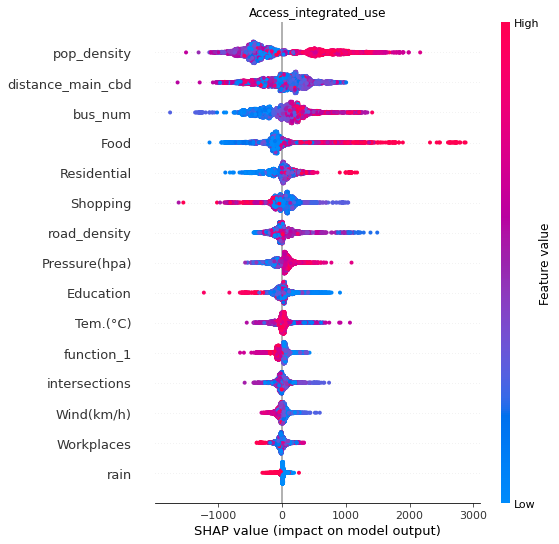

In [15]:
shap.summary_plot(shap_values,test[['function_1', 'road_density', 'intersections', 'Residential', 'Workplaces',
       'Shopping', 'Food', 'Education', 'bus_num',  'pop_density','distance_main_cbd',
                 'Tem.(°C)','Wind(km/h)','Pressure(hpa)','rain']], show=False)

plt.gcf().axes[-1].set_aspect(50)
plt.gcf().axes[-1].set_box_aspect(50)
plt.title('Access_integrated_use')
plt.savefig('shap.png', dpi=600, bbox_inches='tight')

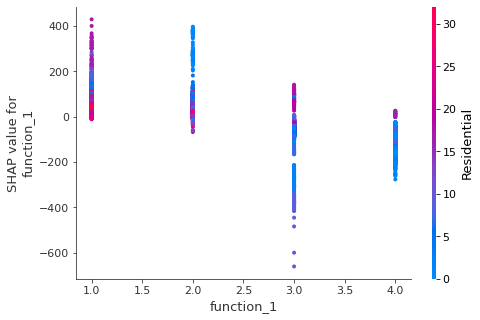

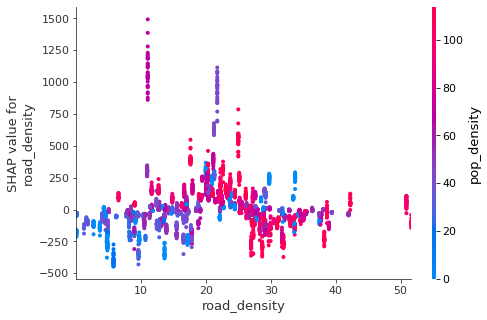

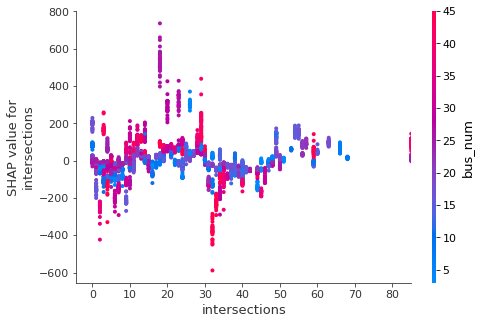

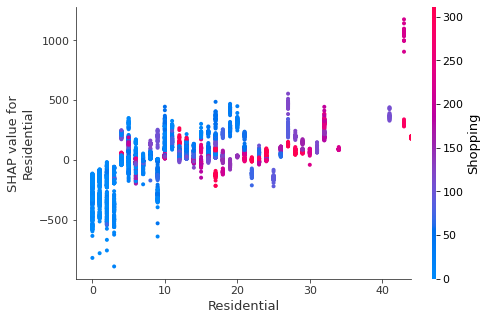

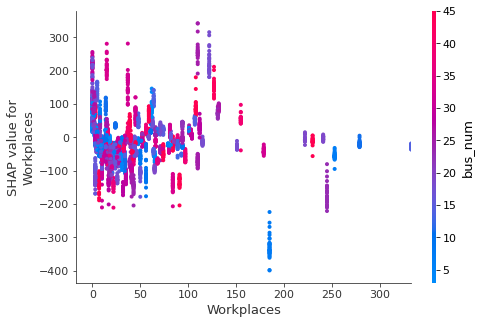

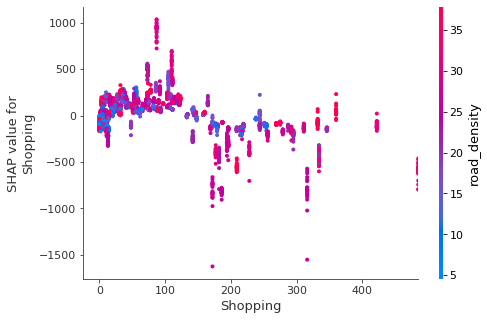

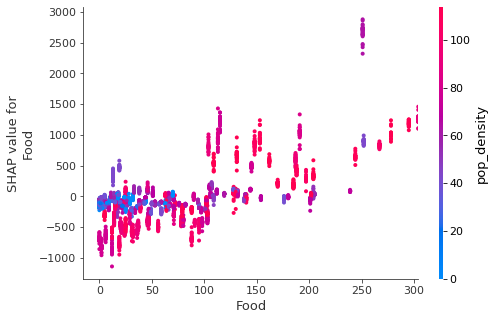

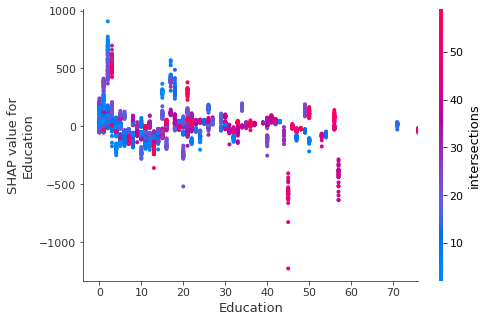

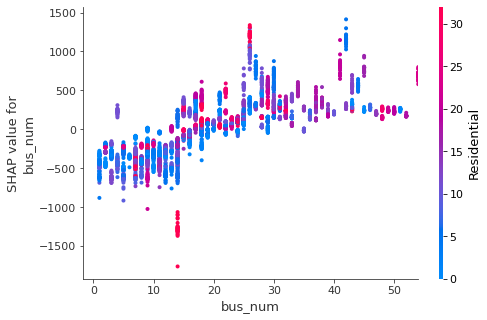

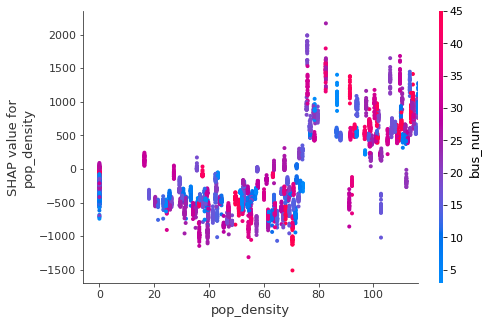

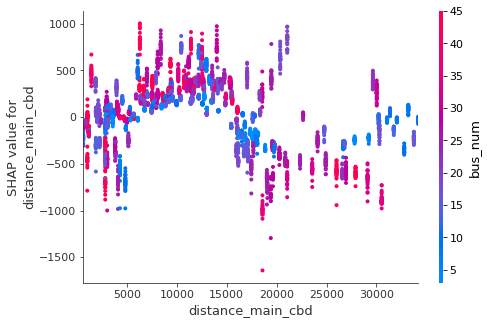

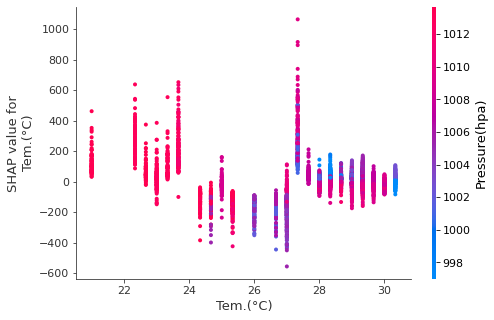

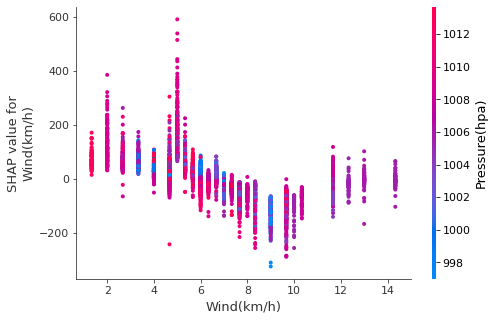

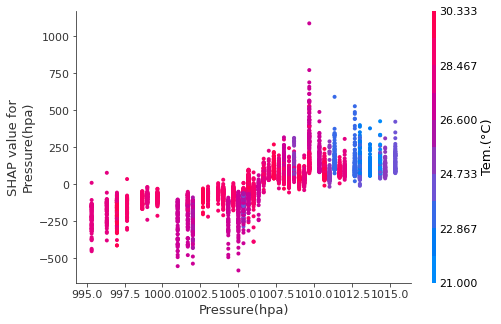

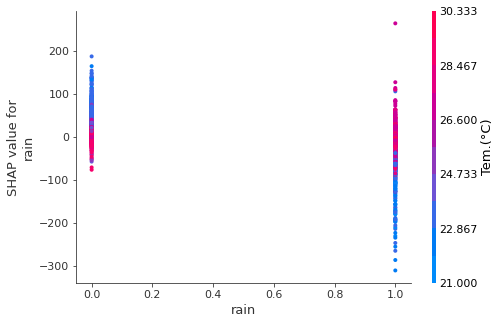

In [16]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
variables = ['function_1', 'road_density', 'intersections', 'Residential', 'Workplaces',
       'Shopping', 'Food', 'Education', 'bus_num',  'pop_density','distance_main_cbd',
                 'Tem.(°C)','Wind(km/h)','Pressure(hpa)','rain']

for i in range(0,len(variables)):
    shap.dependence_plot(variables[i], shap_values, test[['function_1', 'road_density', 'intersections', 'Residential', 'Workplaces',
       'Shopping', 'Food', 'Education', 'bus_num',  'pop_density','distance_main_cbd',
                 'Tem.(°C)','Wind(km/h)','Pressure(hpa)','rain']] ,xmin="percentile(1)", xmax="percentile(99)")


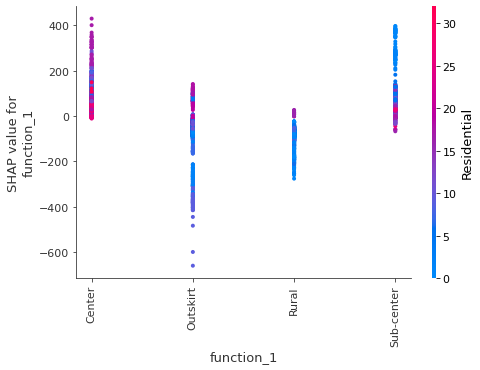

In [17]:
X_area = test[['function_1', 'road_density', 'intersections', 'Residential', 'Workplaces',
       'Shopping', 'Food', 'Education', 'bus_num',  'pop_density','distance_main_cbd',
                 'Tem.(°C)','Wind(km/h)','Pressure(hpa)','rain']].copy()

relationship_decoding = {
 
    1: 'Center',
    2: 'Sub-center',
    3: 'Outskirt',
    4: 'Rural',
}


X_area["function_1"] = X_area["function_1"].map(relationship_decoding)

# You can use string-valued category features
shap.dependence_plot("function_1", shap_values, X_area, xmin="percentile(1)", xmax="percentile(99)")


# Egress_integrated_use

In [18]:
dfE =  df[(df['week']!='Saturday')&(df['week']!='Sunday')]

In [19]:
# ===分割数据集===
train, test = train_test_split(dfE, test_size=0.3)

In [20]:
X_train = train[['function_1', 'road_density', 'intersections', 'Residential', 'Workplaces',
       'Shopping', 'Food', 'Education', 'bus_num',  'pop_density','distance_main_cbd',
                 'Tem.(°C)','Wind(km/h)','Pressure(hpa)','rain']]
y_train = train['trips_O']

X_test = test[['function_1', 'road_density', 'intersections', 'Residential', 'Workplaces',
       'Shopping', 'Food', 'Education', 'bus_num',  'pop_density','distance_main_cbd',
                 'Tem.(°C)','Wind(km/h)','Pressure(hpa)','rain']]
y_test = test['trips_O']

# ===特征缩放===
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)


## 随机森林模型

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rf = RandomForestRegressor().fit(X_train, y_train)

In [23]:
# 预测
y_pred_rf_train = rf.predict(X_train)
y_pred_rf_test = rf.predict(X_test)

In [24]:
# 评估
r2_rf_train = r2_score(y_train, y_pred_rf_train)
r2_rf_test = r2_score(y_test, y_pred_rf_test)

In [25]:
print(r2_rf_train)
print(r2_rf_test)

0.9853388925318681
0.8828403382830073


In [26]:
explainer = shap.Explainer(rf)

In [27]:
shap_values = explainer.shap_values(X_test)

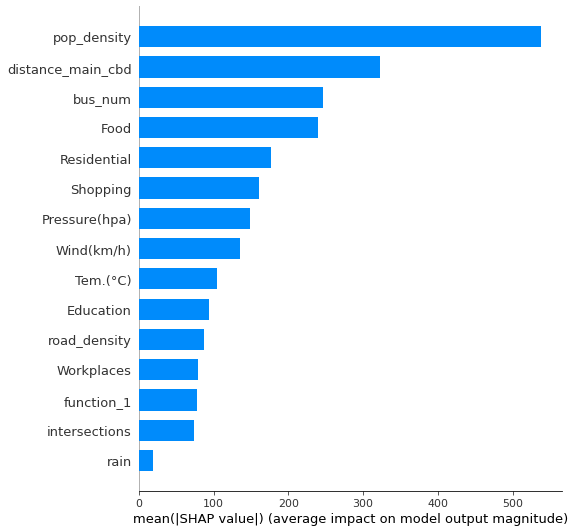

In [28]:
shap.summary_plot(shap_values,  test[['function_1', 'road_density', 'intersections', 'Residential', 'Workplaces',
       'Shopping', 'Food', 'Education', 'bus_num',  'pop_density','distance_main_cbd',
                 'Tem.(°C)','Wind(km/h)','Pressure(hpa)','rain']], 
                  plot_type="bar")

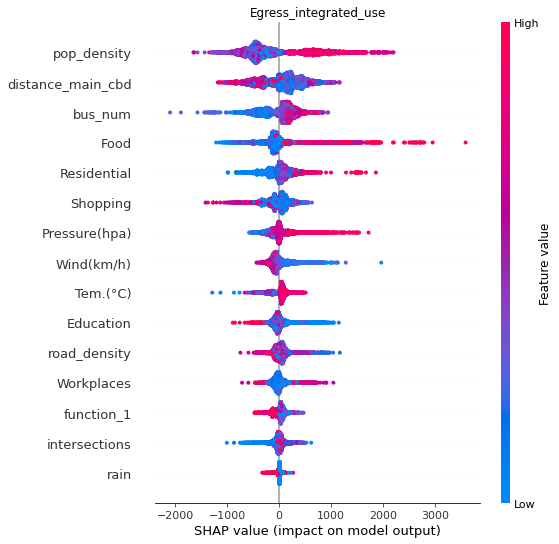

In [29]:
shap.summary_plot(shap_values,test[['function_1', 'road_density', 'intersections', 'Residential', 'Workplaces',
       'Shopping', 'Food', 'Education', 'bus_num',  'pop_density','distance_main_cbd',
                 'Tem.(°C)','Wind(km/h)','Pressure(hpa)','rain']], show=False)

plt.gcf().axes[-1].set_aspect(50)
plt.gcf().axes[-1].set_box_aspect(50)
plt.title('Egress_integrated_use')
plt.savefig('shap.png', dpi=600, bbox_inches='tight')

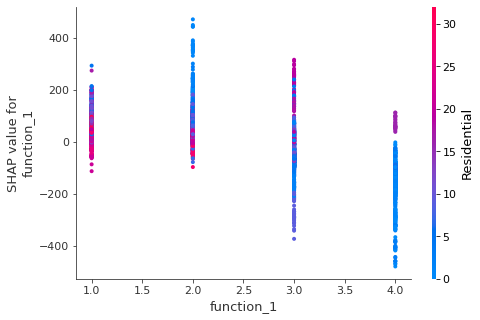

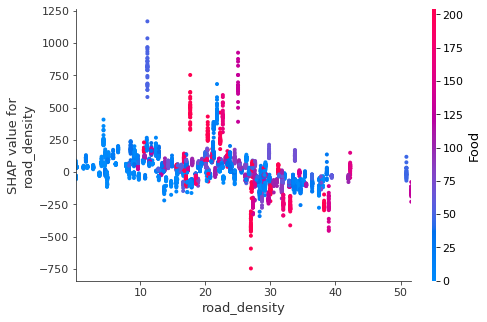

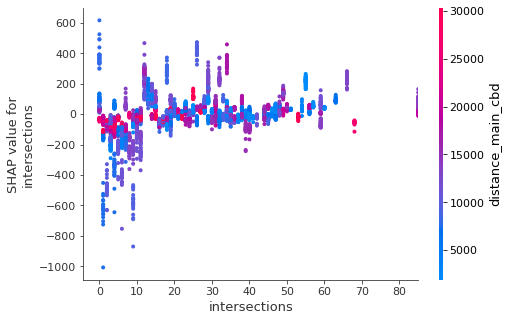

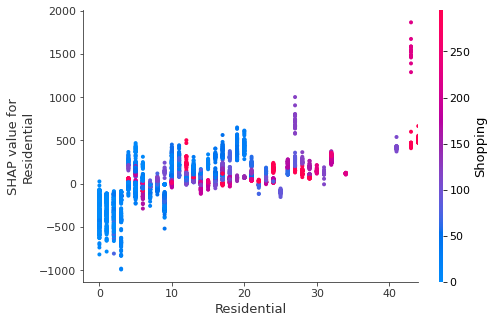

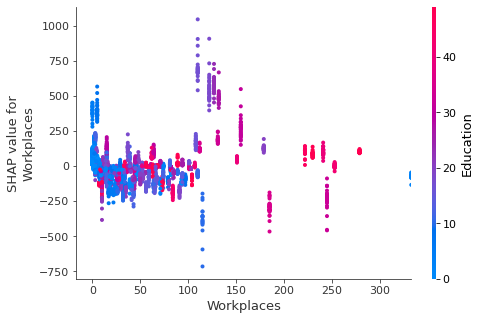

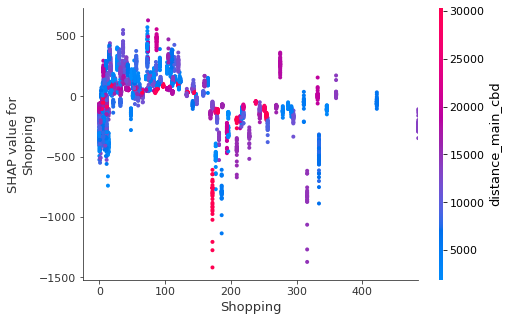

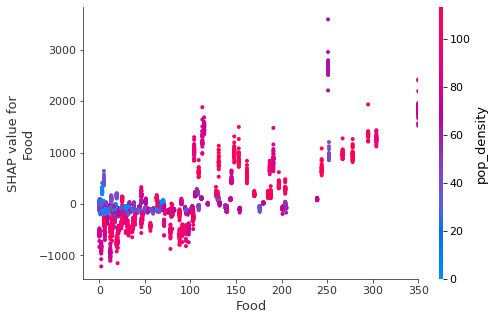

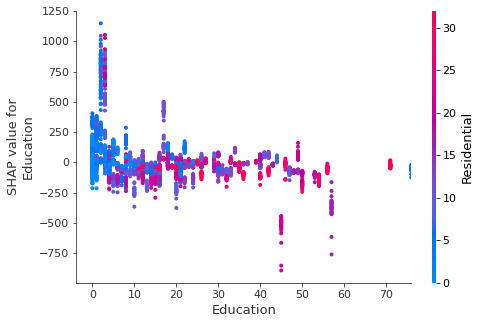

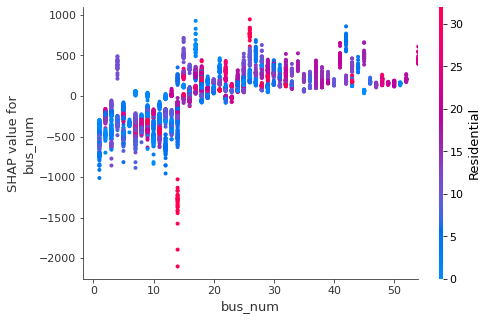

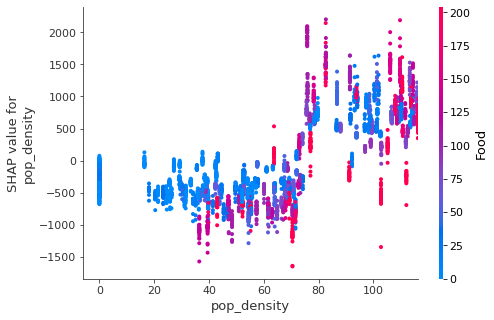

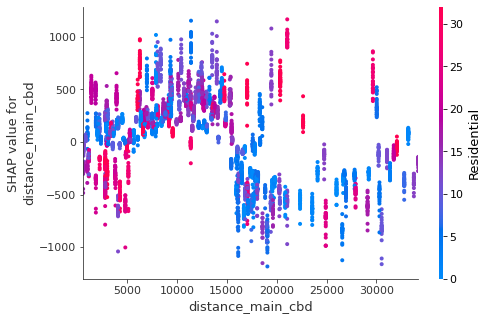

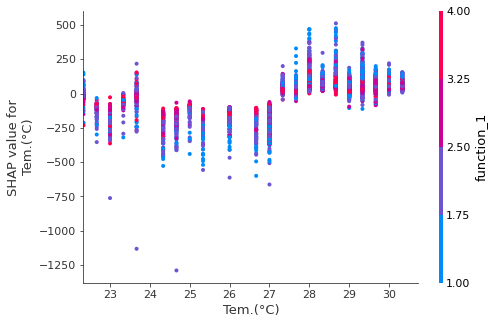

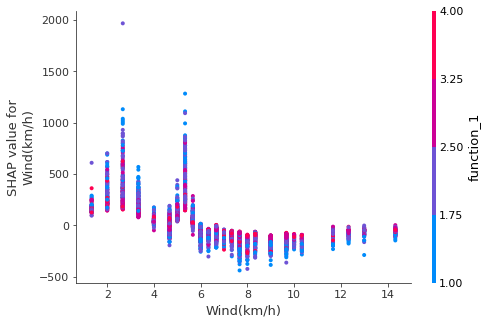

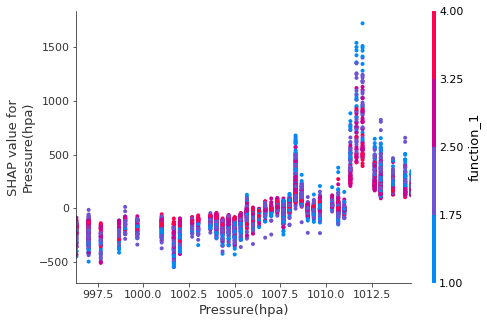

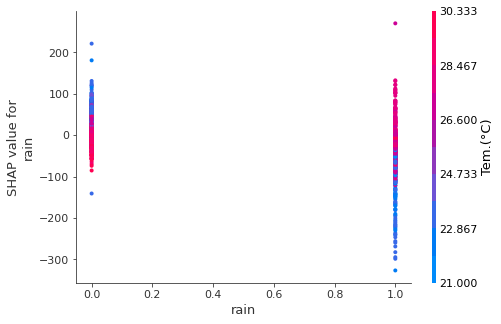

In [30]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
variables = ['function_1', 'road_density', 'intersections', 'Residential', 'Workplaces',
       'Shopping', 'Food', 'Education', 'bus_num',  'pop_density','distance_main_cbd',
                 'Tem.(°C)','Wind(km/h)','Pressure(hpa)','rain']

for i in range(0,len(variables)):
    shap.dependence_plot(variables[i], shap_values, test[['function_1', 'road_density', 'intersections', 'Residential', 'Workplaces',
       'Shopping', 'Food', 'Education', 'bus_num',  'pop_density','distance_main_cbd',
                 'Tem.(°C)','Wind(km/h)','Pressure(hpa)','rain']], xmin="percentile(1)", xmax="percentile(99)")

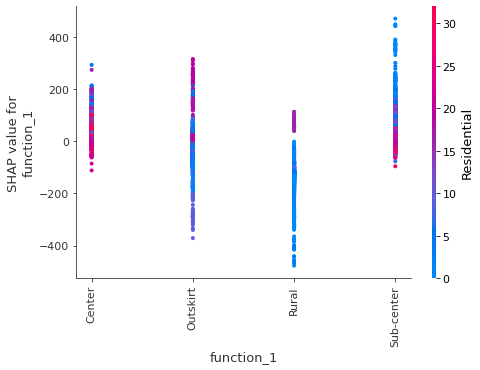

In [31]:
X_area = test[['function_1', 'road_density', 'intersections', 'Residential', 'Workplaces',
       'Shopping', 'Food', 'Education', 'bus_num',  'pop_density','distance_main_cbd',
                 'Tem.(°C)','Wind(km/h)','Pressure(hpa)','rain']].copy()

relationship_decoding = {
 
    1: 'Center',
    2: 'Sub-center',
    3: 'Outskirt',
    4: 'Rural',
}


X_area["function_1"] = X_area["function_1"].map(relationship_decoding)

# You can use string-valued category features
shap.dependence_plot("function_1", shap_values, X_area, xmin="percentile(1)", xmax="percentile(99)")
